# ワードクラウド
### requires
- pip install wordcloud
- pip install matplotlib
- mecab, ipadic-neologd

In [3]:
import pandas as pd
import pickle
with open('../data/twdata.pkl', 'rb') as f:
    data = pickle.load(f)

### フォローしてる人に絞る

In [2]:
follow_df = data_df[(data_df['following']) | (data_df['follow_request_sent'])]

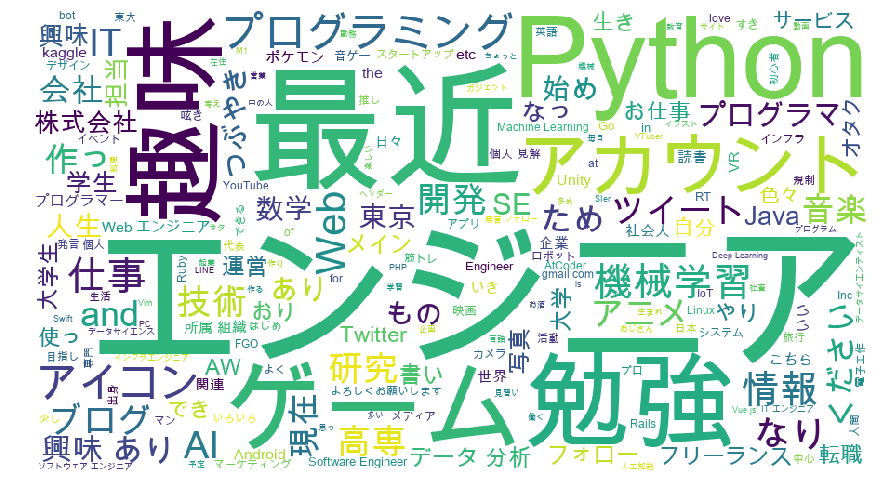

In [49]:
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import MeCab as mc
fpath = "/Library/Fonts/Songti.ttc"
tagger = mc.Tagger('-Ochasen -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')

def mecab_analysis(text):
    words = tagger.parse(text)
    outputs = []  
    for w in words.split('\n'):  
        word = w.split('\t')  
        if word[0] == 'EOS':  
            break    
        word_type = word[3].split('-')[0]  
        if word_type in ['形容詞', '動詞', '名詞', '副詞']:  
            outputs.append(word[0])  
    return outputs  

texts = []
for x in follow_df.description.tolist():
    texts += mecab_analysis(x)

stop_words = [ u'てる', u'いる', u'なる']

wordcloud = WordCloud(background_color="white",
                      font_path=fpath, width=900, height=500,
                      stopwords=set(stop_words)).generate(' '.join(list(texts)))

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()